# Tree-Based Learners

Decision Trees are one of the most popular supervised learning methods used for classification and regression. Among their advantages is their non-parametric nature. They produce models that predict the value of a target variable by learning simple decision rules inferred from the data features.

Pros:

- Fairly simple
- Can be visuzalized.
- Little/no data preparation (normalization, standardization, taking care of missing values, etc.) is required.
- Fast (time complexity is logarithmic in the number of data points used to train the tree).
- They operate equally well on both numerical and categorical features.

Cons:

- Prone to overfitting; they can create large and complex tree structures with poor generalization on the data. Usually, a pruning technique is required.
- Unstable; small changes in data could render the tree uselelss.
- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.


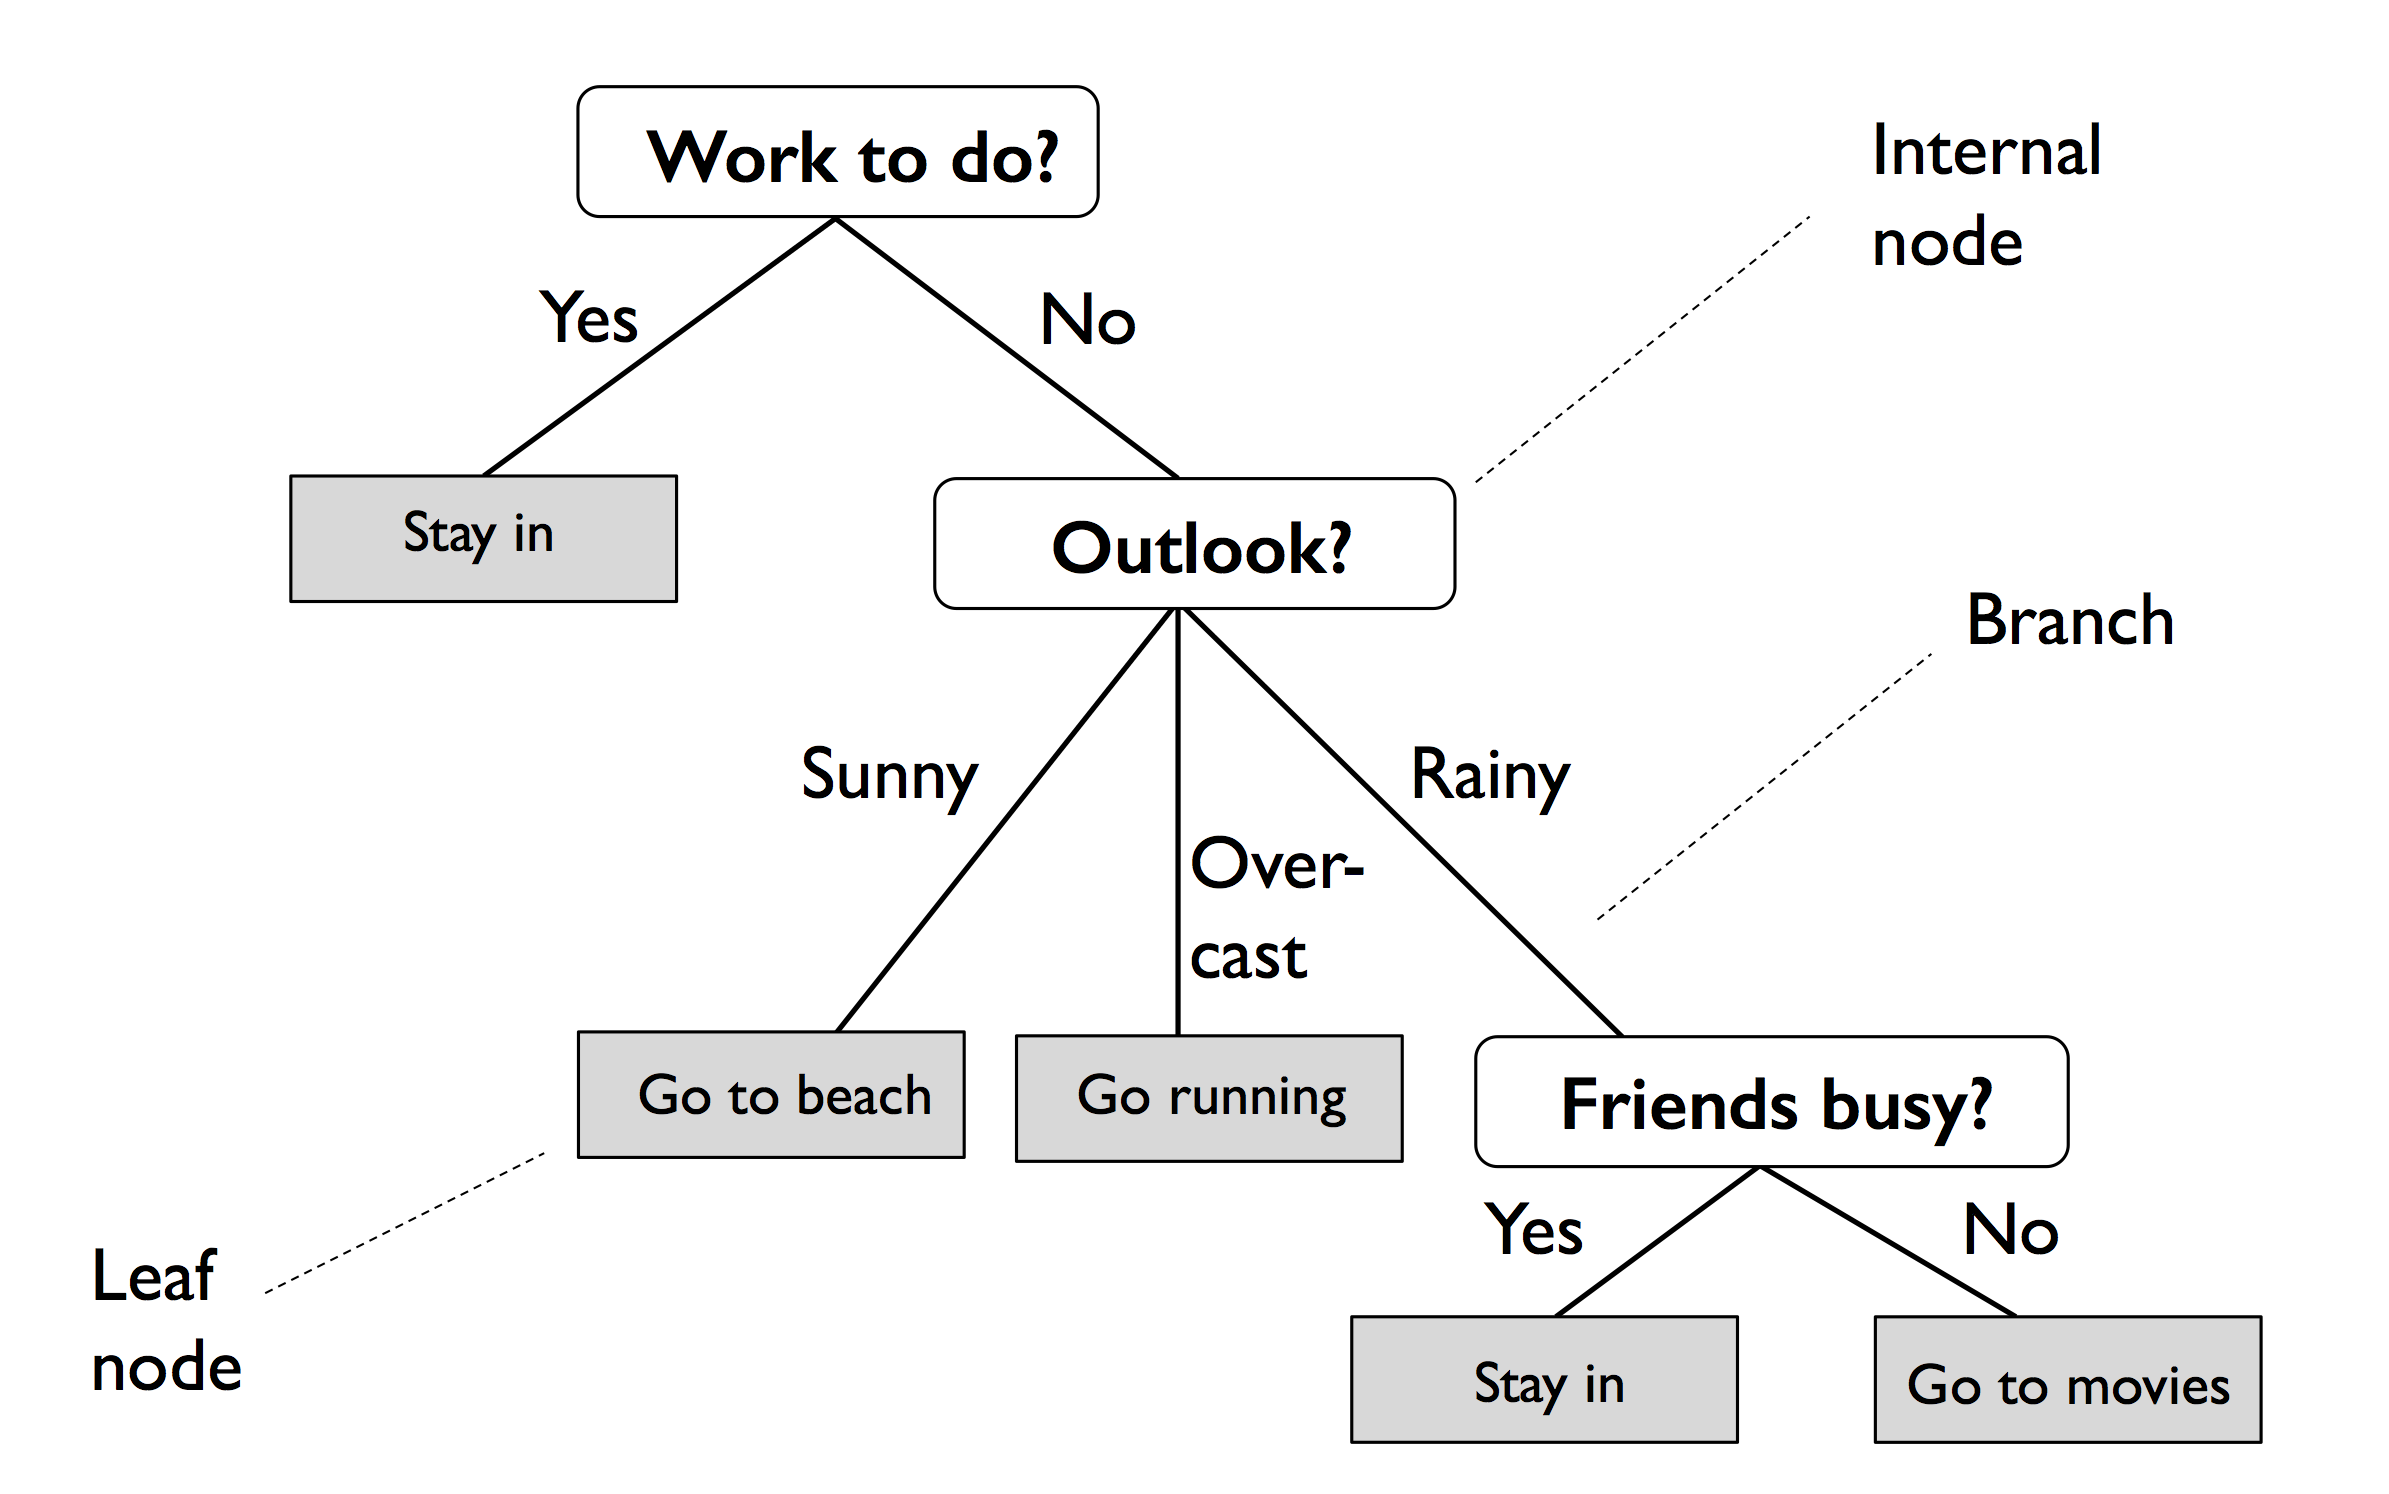

In [1]:
from IPython.display import Image
%matplotlib inline

Image(filename='tree1.png', width=500) 

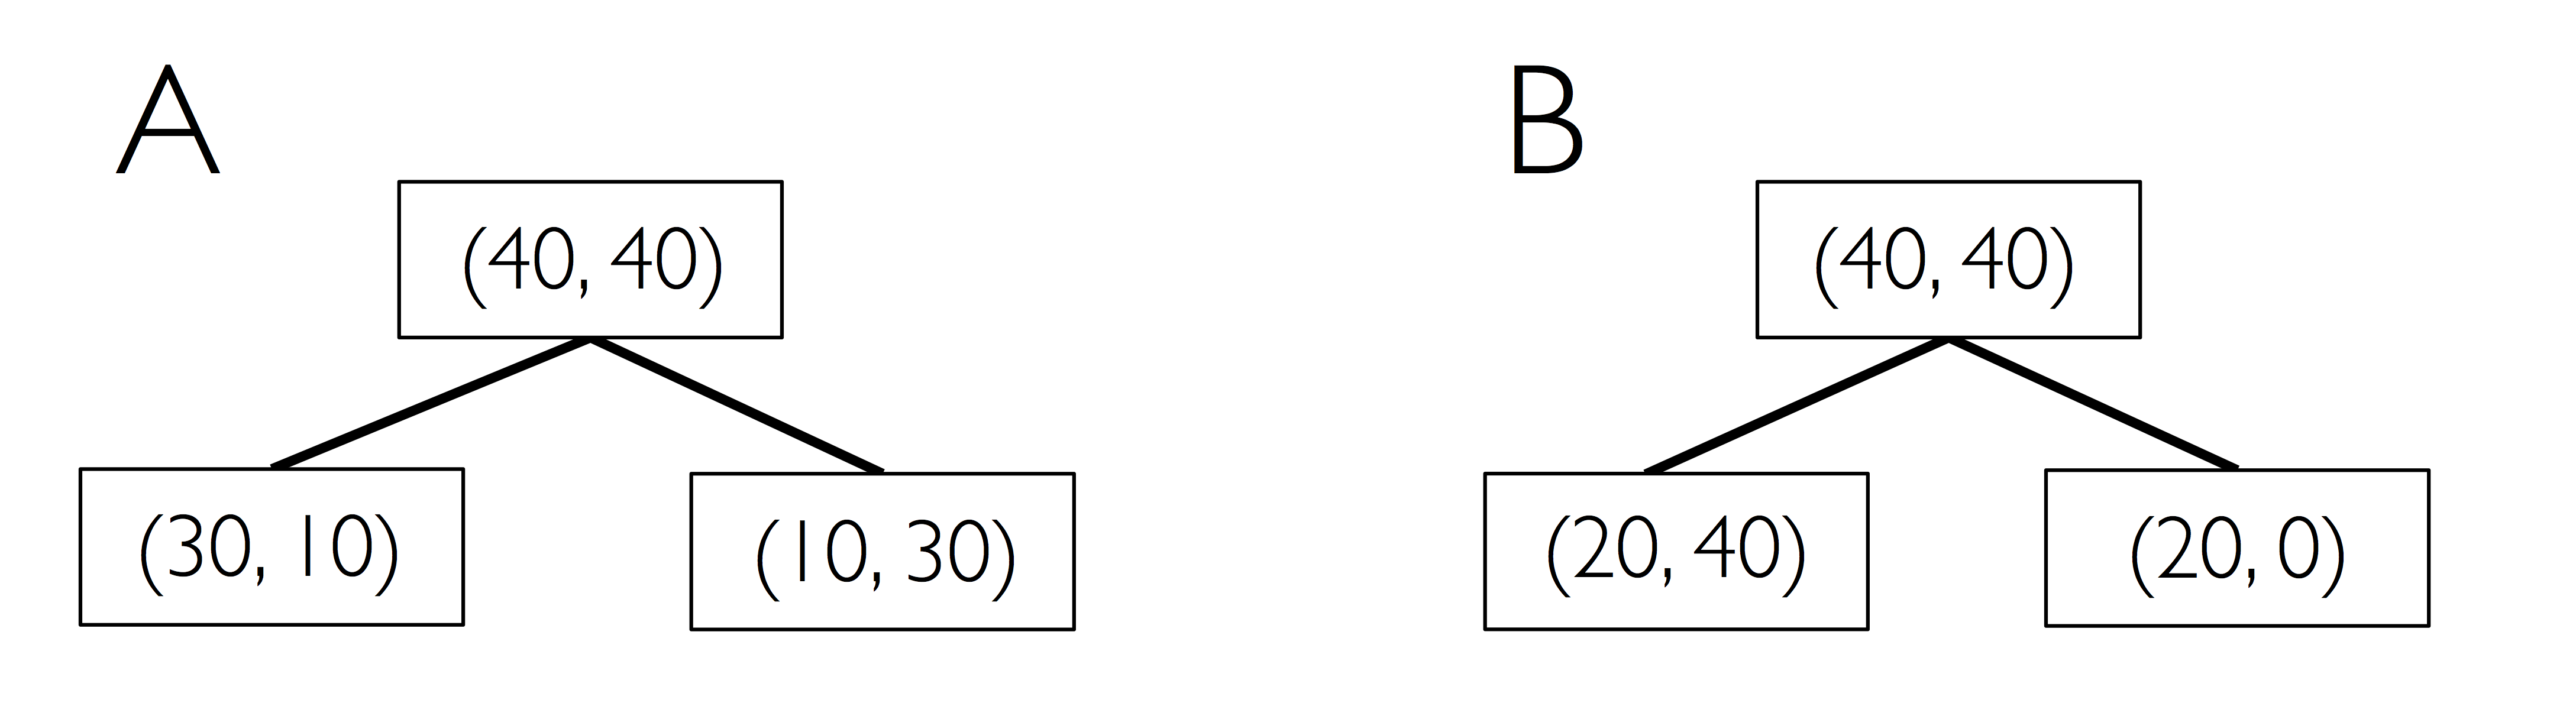

In [2]:
Image(filename='tree2.png', width=500) 

## The IRIS dataset

The IRIS dataset is one of the most common datasets in the pattern recognition and classification literature. It includes 150 examples (instances) that represent flowers of 3 types (classes): Iris-Setosa, Iris-Versicolor, and Iris-Virginica. The dataset contains 50 instances for each of these types.

Each flower instance is described by exactly four characteristics (features):

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

Consequently, each row (instance) in the dataset includes five columns. The first four concern the four aforementioned features, whereas the fifth one is the (integer-encoded) class of the flower:

0. for Iris-Setosa,
1. for Iris-Versicolor, and
2. for Iris-Virginica.

One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

The IRIS dataset is a member of the `datasets` library of scikit-learn. We can easily load it up by calling `datasets.load_iris()`:


In [3]:
from sklearn import datasets
import numpy as np

# Load the IRIS dataset: iris.data stores the input variables (flower features); iris.target stores the target variables.
iris = datasets.load_iris()

X = iris.data[:, [2, 3]]

# Flower Classes: 0 for Iris-Setosa, 1 for Iris-Versicolor, and 2 for Iris-Virginica
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=1, stratify = y)

In [5]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


## Standardize features

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

$$z = \frac{x - u}{s}$$

where $u$ is the mean of the training samples or $0$ if `with_mean=False`, and $s$ is the standard deviation of the training samples or $1$ if `with_std=False`.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with $0$ mean and unit variance).

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around $0$ and have variance in the same order. **If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.**


In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


## Building a decision tree with scikit-learn

The scikit-learn library offfers the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) library for builiding Decision Trees for classification tasks. The classifier has numerous parameters:

* `citerion`: The function to measure the quality of a split. Possible values for the `citerion` parameter are:
  1. `gini`(default): minimizes the probability of misclassification. It is given by the equation $Gini=1-\sum_j{p_j^2}$
  2. `entropy`: maximizes the mutual information (by constructing an equal probability node) in the decision tree. It is given by the equation $Entropy=-\sum_j{p_j}\log_2p_j$
* `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
* `min_samples_split`: The minimum number of samples required to split an internal node.
* `min_samples_leaf`: The minimum number of samples required to to be at a leaf node.



In [7]:
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree for classification tasks
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded
#            until all leaves are pure or all leaves contain less than
#             min_samples_split samples.
# min_samples_split: The min number of samples required to split an internal node.
# min_samples_leaf:  The min number of samples required to to be at a leaf node.
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=1)

## Evaluation

In [8]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import hamming_loss

y_pred = tree_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
mse = mean_squared_error(y_test, y_pred)
hl = hamming_loss(y_test, y_pred)

print("Accuracy: ", acc)
print("F1: ", f1)
print("MSE: ", mse)
print("Ham Loss: ", hl)

Accuracy:  0.9777777777777777
F1:  0.9777530589543938
MSE:  0.022222222222222223
Ham Loss:  0.022222222222222223


In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# A function for plotting the decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'v', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

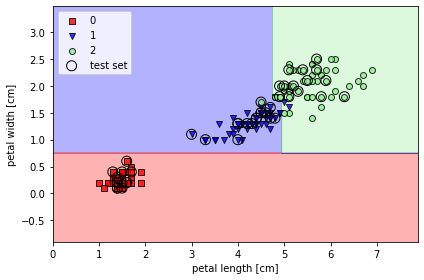

In [10]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx = range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

## Vizualization of the produced tree model

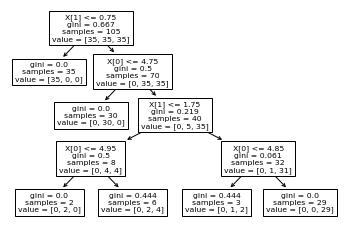

True

In [11]:
from sklearn import tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

# The tree_model produced by DecisionTreeClassifier can be vizualized with tree.plot_tree
tree.plot_tree(tree_model)

plt.show()

# and then be converted to a standard .png image with export_graphviz
dot_data = export_graphviz(tree_model, filled=True, rounded=True,
            class_names=['Setosa', 'Versicolor', 'Virginica'],
            feature_names=['petal length', 'petal width'],
            out_file=None)

graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

## Random Forests

Random Forests are meta estimators that base their operation on a set of fixed number of Decision Trees. The algorithm fits each Decision Tree Classifiers on a sub-sample of the dataset. In the sequel, it uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is controlled with the `max_samples` parameter if `bootstrap=True (default)`, otherwise the whole dataset is used to build each tree.

The scikit-learn library offfers the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) library for builiding Random Forests for classification tasks. The classifier has numerous parameters which primarily concern the components (i.e. the Decision Trees) that comprise the Random Forest. In short, the most important include:

* `citerion`: The function to measure the quality of a split. Possible values for the <code>citerion</code> parameter are:
  1. `gini` (default): minimizes the probability of misclassification. It is given by the equation $Gini=1-\sum_j{p_j^2}$.
  2. `entropy`: maximizes the mutual information (by constructing an equal probability node) in the decision tree. It is given by the equation $Entropy=-\sum_j{p_j}\log_2p_j$.
* `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
* `min_samples_split`: The minimum number of samples required to split an internal node.
* `min_samples_leaf`: The minimum number of samples required to to be at a leaf node.


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest comprised of 25 decision trees
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

## Evaluation

In [13]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import hamming_loss

y_pred = forest.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
mse = mean_squared_error(y_test, y_pred)
hl = hamming_loss(y_test, y_pred)

print("Accuracy: ", acc)
print("F1: ", f1)
print("MSE: ", mse)
print("Ham Loss: ", hl)

Accuracy:  0.9777777777777777
F1:  0.9777530589543938
MSE:  0.022222222222222223
Ham Loss:  0.022222222222222223


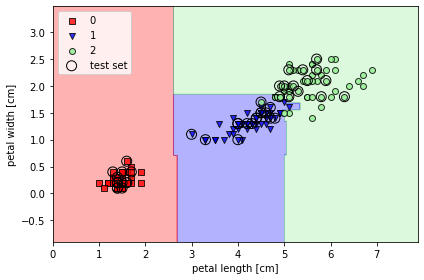

In [14]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()